In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles,make_moons
X, y = make_circles(n_samples=1000,factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf",  gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)


In [ ]:
X_kpca.shape

(1000, 383)

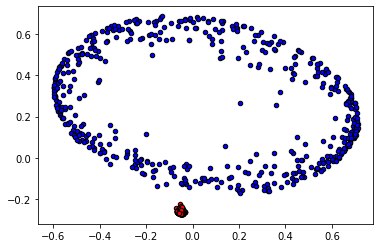

In [ ]:

reds = y == 0
blues = y == 1
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')


Text(0.5, 1.0, 'Original data')

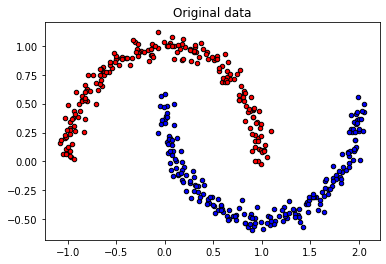

In [ ]:
X, y = make_moons(n_samples=400, noise=.05, random_state=0)

kpca = KernelPCA(kernel="poly",gamma=0.5,degree=2)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)
reds = y == 0
blues = y == 1
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original data")

In [ ]:
X_kpca.shape

(400, 5)

In [ ]:
X_kpca.shape

(400, 5)

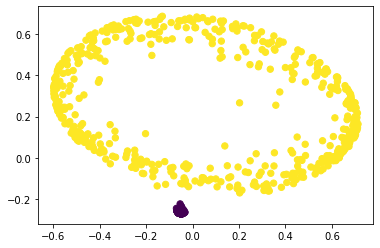

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2,n_init=1).fit(X_kpca)
labels = gmm.predict(X_kpca)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=40, cmap='viridis')

In [ ]:
def cluster_acc(Y_pred, Y):
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert Y_pred.size == Y.size
    D = max(Y_pred.max(), Y.max())+1
    w = np.zeros((D,D), dtype=np.int64)
    for i in range(Y_pred.size):
        w[Y_pred[i], Y[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i,j] for i,j in ind])*1.0/Y_pred.size

In [ ]:
cluster_acc(labels,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


1.0

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
clf = QDA()
clf.fit(X_kpca, y)

labels=(clf.predict(X_kpca))
accuracy_score(y,labels)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


1.0

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2,n_init=30).fit(X)
labels = gmm.predict(X)

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: ignored

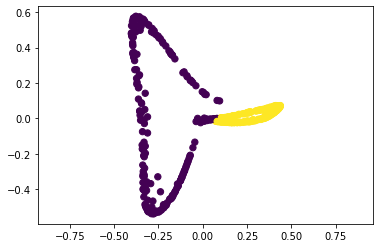

In [ ]:
plot_gmm(gmm, X_kpca)